This notebook utilizes libraries like `pandas` for data manipulation, `matplotlib`, `seaborn`, and `plotly` for static and interactive visualizations, and `nltk` for text preprocessing tasks such as sentence tokenization. Warnings are suppressed for cleaner output using `warnings.filterwarnings("ignore")`.

In [1]:

%pip install jupyter notebook ipykernel
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install plotly


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
import nltk
import warnings

import plotly.express as px
import plotly.io as pio

warnings.filterwarnings("ignore")

The `nltk.download('punkt')` command downloads the Punkt tokenizer models, which are pre-trained data required by NLTK to tokenize text into sentences or words. These models enable functions like `sent_tokenize` and `word_tokenize` to split text accurately. Ensure to run this command during setup to preprocess text effectively.

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This step ensures the SAMSum dataset is loaded into memory and ready for further exploration, such as data inspection, cleaning, and preprocessing for summarization tasks.or summarization tasks.or summarization tasks.

In [4]:
train_file = "C:/Users/Kushal/OneDrive/Desktop/Text-Summarization-NLP-Project/train.csv"
df = pd.read_csv(train_file)

df

Text  \
0     Appeal No. LXVI of 1949.\nAppeal from the High...   
1     Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2     iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3     Appeal No. 388 of 1960.\nAppeal by special lea...   
4     Appeal No. 198 of 1954.\nAppeal from the judgm...   
...                                                 ...   
7025  Appeal No. 761 of 1957.\nAppeal by special lea...   
7026  Appeal No. 761 of 1957.\nAppeal by special lea...   
7027  Appeal No. 53 of 1958.\nAppeal by special leav...   
7028  Appeal No. 4 of 1960.\nAppeal by special leave...   
7029  Appeal No. 337 of 1960.\nAppeal by special lea...   

                                                Summary  
0     The charge created in respect of municipal pro...  
1     An agreement for a lease, which a lease is by ...  
2     The question whether a Magistrate is "personal...  
3     The appellant was a member of a joint Hindu fa...  
4     The appellant was the Ruler of the State of Ba...  
...                                                 ...  
7025  The respondent company purchased certain machi...  
7026  The respondent company purchased certain machi...  
7027  While this appeal by special leave, relating t...  
7028  The Punjab Government issued notification unde...  
7029  The respondent who was a District and Sessions...  

[7030 rows x 2 columns]

In [5]:
df = df[0: 1000]

df

Text  \
0    Appeal No. LXVI of 1949.\nAppeal from the High...   
1    Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2    iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3    Appeal No. 388 of 1960.\nAppeal by special lea...   
4    Appeal No. 198 of 1954.\nAppeal from the judgm...   
..                                                 ...   
995  ivil Appeal No. 414 of 1965.\nAppeal from the ...   
996  ivil Appeal No. 195 of 1963.\nAppeal from the ...   
997  Appeal No. 765 of1964.\nAppeal by special leav...   
998  ivil Appeal No. 875 of 1964.\nAppeal by specia...   
999  ppeal No. 652 of 1964, Appeal from the judgmen...   

                                               Summary  
0    The charge created in respect of municipal pro...  
1    An agreement for a lease, which a lease is by ...  
2    The question whether a Magistrate is "personal...  
3    The appellant was a member of a joint Hindu fa...  
4    The appellant was the Ruler of the State of Ba...  
..                                                 ...  
995  The appellant .company reduced its capital and...  
996  A widow whose estate was under the charge of t...  
997  The appellant 's election was challenged inter...  
998  The appellant and respondent were the tenant a...  
999  The Sales Tax Officer rejected the assessed 's...  

[1000 rows x 2 columns]

In [6]:
print(df['Text'].at[0])

Appeal No. LXVI of 1949.
Appeal from the High Court of judicature, Bombay, in a reference under section 66 of the Indian Income tax Act, 1022.
K.M. Munshi (N. P. Nathvani, with him), for the appel lant. ' M.C. Setalvad, Attorney General for India (H. J. Umrigar, with him), for the respondent. 1950.
May 26.
The judgment of the Court was delivered by MEHR CHAND MAHAJAN J.
This is an appeal against a judgment of the High Court of Judicature at Bombay in an income tax matter and it raises the question whether munici pal property tax and urban immoveable property tax payable under the relevant Bombay Acts are allowable deductions under section 9 (1) (iv) of the Indian Income tax Act.
The assessee company is an investment company deriving its income from properties in the city of Bombay.
For the assessment year 1940 41 the net income of the assessee under the head "property" was computed by the Income tax Officer in the sum of Rs. 6,21,764 after deducting from gross rents certain payments.
T

In [7]:
print(df['Summary'].at[0])

The charge created in respect of municipal property tax by section 212 of the City of Bombay Municipal Act, 1888, is an "annual charge not being a capital charge" within the mean ing of section 9 (1) (iv) of the Indian Income tax Act, 199.2, and the amount of such charge should therefore be deducted in computing the income from such property for the purposes of section 9 of the Indian Income tax Act.
The charge in respect of urban immoveable property tax created by the Bombay Finance Act, 1939 is similar in character and the amount of such charge should also be deducted.
The expression "capital charge" in s.9(1) (iv) means a charge created for a capital sum,that is to say, a charge created to. ' secure the discharge of a liability of a capi tal nature; and an "annual charge" means a charge to secure an annual liabili ty. 554



If df contains data from the SAMSum dataset, you’ll see the first 5 rows, likely including columns such as dialogue and summary, which are essential for summarization tasks.

In [8]:
df.head()

Text  \
0  Appeal No. LXVI of 1949.\nAppeal from the High...   
1  Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2  iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3  Appeal No. 388 of 1960.\nAppeal by special lea...   
4  Appeal No. 198 of 1954.\nAppeal from the judgm...   

                                             Summary  
0  The charge created in respect of municipal pro...  
1  An agreement for a lease, which a lease is by ...  
2  The question whether a Magistrate is "personal...  
3  The appellant was a member of a joint Hindu fa...  
4  The appellant was the Ruler of the State of Ba...

If df contains data from the SAMSum dataset, you’ll see the last 5 rows, likely including columns such as dialogue and summary, which are essential for summarization tasks.

In [9]:
df.tail()

Text  \
995  ivil Appeal No. 414 of 1965.\nAppeal from the ...   
996  ivil Appeal No. 195 of 1963.\nAppeal from the ...   
997  Appeal No. 765 of1964.\nAppeal by special leav...   
998  ivil Appeal No. 875 of 1964.\nAppeal by specia...   
999  ppeal No. 652 of 1964, Appeal from the judgmen...   

                                               Summary  
995  The appellant .company reduced its capital and...  
996  A widow whose estate was under the charge of t...  
997  The appellant 's election was challenged inter...  
998  The appellant and respondent were the tenant a...  
999  The Sales Tax Officer rejected the assessed 's...

If df contains the SAMSum dataset, you’ll see 5 randomly selected rows, which might include columns like dialogue (the conversational text) and summary (the corresponding generated summary).

In [10]:
df.sample(5)

Text  \
696  Appeal No. 1 of 1962.\nAppeal from the judgmen...   
329  Appeal No. 171 of 1958.\nAppeal by special lea...   
554  riminal Apeal No. 6 of 1960.\nAppeal by specia...   
176  Appeal No. 264 of 1960.\nAppeal by special lea...   
449  N: Cr. A. No. 189 of 1961.\nAppeal by special ...   

                                               Summary  
696  The property in the suit originally belonged t...  
329  The appellants applied to the Rent Controller ...  
554  The appellant, tried with another, was convict...  
176  One Bbanu Bala had joined the appellant 's ser...  
449  The detenue was served with the order of deten...

The df.info() command in Pandas provides a concise summary of the DataFrame, giving you an overview of its structure and data. It is particularly useful for understanding the dataset at a glance.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     1000 non-null   object
 1   Summary  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# Data Cleaning

The line df.isna().sum() checks for missing values in each column of the DataFrame df. It returns the total count of NaN (Not a Number) or missing values per column, helping identify where data cleaning is needed.

In [12]:
df.isna().sum()

Text       0
Summary    0
dtype: int64

The line df = df.dropna() removes any rows from the DataFrame df that contain missing (NaN) values in any of the columns. After this operation, the DataFrame is updated to exclude those rows, ensuring that all remaining rows contain complete data.

In [13]:
df = df.dropna()

df

Text  \
0    Appeal No. LXVI of 1949.\nAppeal from the High...   
1    Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2    iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3    Appeal No. 388 of 1960.\nAppeal by special lea...   
4    Appeal No. 198 of 1954.\nAppeal from the judgm...   
..                                                 ...   
995  ivil Appeal No. 414 of 1965.\nAppeal from the ...   
996  ivil Appeal No. 195 of 1963.\nAppeal from the ...   
997  Appeal No. 765 of1964.\nAppeal by special leav...   
998  ivil Appeal No. 875 of 1964.\nAppeal by specia...   
999  ppeal No. 652 of 1964, Appeal from the judgmen...   

                                               Summary  
0    The charge created in respect of municipal pro...  
1    An agreement for a lease, which a lease is by ...  
2    The question whether a Magistrate is "personal...  
3    The appellant was a member of a joint Hindu fa...  
4    The appellant was the Ruler of the State of Ba...  
..                                                 ...  
995  The appellant .company reduced its capital and...  
996  A widow whose estate was under the charge of t...  
997  The appellant 's election was challenged inter...  
998  The appellant and respondent were the tenant a...  
999  The Sales Tax Officer rejected the assessed 's...  

[1000 rows x 2 columns]

Counts the number of missing values (NaN) in each column of the DataFrame df.

In [14]:
df.isna().sum()

Text       0
Summary    0
dtype: int64

Installs the contractions library, which is used to expand contracted words (e.g., "I'm" to "I am") in text, useful for text preprocessing in natural language processing (NLP) tasks.

In [15]:
%pip install contractions

Note: you may need to restart the kernel to use updated packages.


The code imports several libraries: re for regular expressions, spacy for natural language processing tasks, emoji for handling emojis, and fix from the contractions library to expand contractions. It loads the English language model from spacy for text processing. Two functions are defined for cleaning text: clean_dialogue processes the dialogue by removing special tags, replacing newlines with spaces, converting text to lowercase, expanding contractions, demojizing emojis, and lemmatizing the text, while clean_summary cleans the summary by removing extra spaces, replacing newlines, and expanding contractions. These functions are then applied to the "dialogue" and "summary" columns of the DataFrame df, and the cleaned versions are stored in new columns cleaned_dialogue and cleaned_summary, respectively.

In [16]:
%pip install spacy emoji 



In [17]:
import re
import spacy
import emoji
from contractions import fix

nlp = spacy.load("en_core_web_sm")

# Clean Dialogue (Input)
def clean_dialogue(dialogue):
    dialogue = re.sub(r"<.*?>", "", dialogue)  # Remove special tags
    dialogue = re.sub(r"\\r\\n", " ", dialogue)  # Replace newlines
    dialogue = re.sub(r"\s+", " ", dialogue).strip()  # Remove extra spaces
    dialogue = dialogue.lower()  # Convert to lowercase
    dialogue = fix(dialogue)  # Expand contractions
    dialogue = emoji.demojize(dialogue)  # Convert emojis to text
    doc = nlp(dialogue)
    dialogue = " ".join([token.lemma_ for token in doc if not token.is_punct])  # Lemmatize
    return dialogue

# Clean Summary (Label)
def clean_summary(summary):
    summary = re.sub(r"\s+", " ", summary).strip()  # Remove extra spaces
    summary = re.sub(r"\\r\\n", " ", summary)  # Replace newlines
    summary = fix(summary)  # Expand contractions
    return summary

# Apply Cleaning
df["cleaned_dialogue"] = df["Text"].apply(clean_dialogue)
df["cleaned_summary"] = df["Summary"].apply(clean_summary)

The command df simply displays the contents of the DataFrame df in a Jupyter notebook or a Kaggle environment. It shows the dataset with its columns and rows, including any transformations or modifications applied to it.

In [18]:
df

Text  \
0    Appeal No. LXVI of 1949.\nAppeal from the High...   
1    Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2    iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3    Appeal No. 388 of 1960.\nAppeal by special lea...   
4    Appeal No. 198 of 1954.\nAppeal from the judgm...   
..                                                 ...   
995  ivil Appeal No. 414 of 1965.\nAppeal from the ...   
996  ivil Appeal No. 195 of 1963.\nAppeal from the ...   
997  Appeal No. 765 of1964.\nAppeal by special leav...   
998  ivil Appeal No. 875 of 1964.\nAppeal by specia...   
999  ppeal No. 652 of 1964, Appeal from the judgmen...   

                                               Summary  \
0    The charge created in respect of municipal pro...   
1    An agreement for a lease, which a lease is by ...   
2    The question whether a Magistrate is "personal...   
3    The appellant was a member of a joint Hindu fa...   
4    The appellant was the Ruler of the State of Ba...   
..                                                 ...   
995  The appellant .company reduced its capital and...   
996  A widow whose estate was under the charge of t...   
997  The appellant 's election was challenged inter...   
998  The appellant and respondent were the tenant a...   
999  The Sales Tax Officer rejected the assessed 's...   

                                      cleaned_dialogue  \
0    appeal no lxvi of 1949 appeal from the high co...   
1    civil appeal no.94 of 1949 107 834 appeal from...   
2    iminal appeal no 40 of 1951 127 appeal from th...   
3    appeal no 388 of 1960 appeal by special leave ...   
4    appeal no 198 of 1954 appeal from the judgment...   
..                                                 ...   
995  ivil appeal no 414 of 1965 appeal from the jud...   
996  ivil appeal no 195 of 1963 appeal from the jud...   
997  appeal no 765 of1964 appeal by special leave f...   
998  ivil appeal no 875 of 1964 appeal by special l...   
999  ppeal no 652 of 1964 appeal from the judgment ...   

                                       cleaned_summary  
0    The charge created in respect of municipal pro...  
1    An agreement for a lease, which a lease is by ...  
2    The question whether a Magistrate is "personal...  
3    The appellant was a member of a joint Hindu fa...  
4    The appellant was the Ruler of the State of Ba...  
..                                                 ...  
995  The appellant .company reduced its capital and...  
996  A widow whose estate was under the charge of t...  
997  The appellant 's election was challenged inter...  
998  The appellant and respondent were the tenant a...  
999  The Sales Tax Officer rejected the assessed 's...  

[1000 rows x 4 columns]

The code defines three functions to compute text features: word_count, unique_word_count, and avg_word_length. These functions calculate the total number of words, the number of unique words, and the average length of words in a text, respectively. Then, the code applies these functions to the cleaned dialogue and summary columns of the DataFrame df and stores the results in new columns:

dialogue_word_count: The total word count of the cleaned dialogue.
summary_word_count: The total word count of the cleaned summary.
dialogue_unique_word_count: The number of unique words in the cleaned dialogue.
summary_unique_word_count: The number of unique words in the cleaned summary.
dialogue_avg_word_length: The average word length in the cleaned dialogue.
summary_avg_word_length: The average word length in the cleaned summary.

In [19]:
# Function to calculate word count
def word_count(text):
    return len(text.split())
def char_count(text):
    return len(text)

# Function to calculate unique word count
def unique_word_count(text):
    return len(set(text.split()))

# Function to calculate average word length
def avg_word_length(text):
    words = text.split()
    if len(words) > 0:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0

# Add columns to the DataFrame
df['dialogue_word_count'] = df['cleaned_dialogue'].apply(word_count)
df['summary_word_count'] = df['cleaned_summary'].apply(word_count)
df['dialogue_char_count'] = df['cleaned_dialogue'].apply(char_count)
df['summary_char_count'] = df['cleaned_summary'].apply(char_count)

df['dialogue_unique_word_count'] = df['cleaned_dialogue'].apply(unique_word_count)
df['summary_unique_word_count'] = df['cleaned_summary'].apply(unique_word_count)

df['dialogue_avg_word_length'] = df['cleaned_dialogue'].apply(avg_word_length)
df['summary_avg_word_length'] = df['cleaned_summary'].apply(avg_word_length)

df.head()

Text  \
0  Appeal No. LXVI of 1949.\nAppeal from the High...   
1  Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2  iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3  Appeal No. 388 of 1960.\nAppeal by special lea...   
4  Appeal No. 198 of 1954.\nAppeal from the judgm...   

                                             Summary  \
0  The charge created in respect of municipal pro...   
1  An agreement for a lease, which a lease is by ...   
2  The question whether a Magistrate is "personal...   
3  The appellant was a member of a joint Hindu fa...   
4  The appellant was the Ruler of the State of Ba...   

                                    cleaned_dialogue  \
0  appeal no lxvi of 1949 appeal from the high co...   
1  civil appeal no.94 of 1949 107 834 appeal from...   
2  iminal appeal no 40 of 1951 127 appeal from th...   
3  appeal no 388 of 1960 appeal by special leave ...   
4  appeal no 198 of 1954 appeal from the judgment...   

                                     cleaned_summary  dialogue_word_count  \
0  The charge created in respect of municipal pro...                 3356   
1  An agreement for a lease, which a lease is by ...                 2396   
2  The question whether a Magistrate is "personal...                 3213   
3  The appellant was a member of a joint Hindu fa...                 3497   
4  The appellant was the Ruler of the State of Ba...                 2575   

   summary_word_count  dialogue_char_count  summary_char_count  \
0                 152                17786                 836   
1                 153                12595                 799   
2                 348                17541                2039   
3                 216                19092                1278   
4                 229                13878                1275   

   dialogue_unique_word_count  summary_unique_word_count  \
0                         650                         75   
1                         561                        102   
2                         727                        180   
3                         601                         96   
4                         450                        105   

   dialogue_avg_word_length  summary_avg_word_length  
0                  4.300060                 4.506579  
1                  4.257095                 4.228758  
2                  4.459695                 4.862069  
3                  4.459823                 4.921296  
4                  4.389903                 4.572052

# Data Visualization

The code generates a series of histograms to visualize various text features in the DataFrame df, including word counts, character counts, and average word lengths for both the dialogue and summary columns. It starts by defining a list of columns to visualize and assigns distinct colors to each plot using Seaborn's husl palette. A grid of subplots (4 rows, 2 columns) is created, and a histogram with a Kernel Density Estimate (KDE) is plotted for each feature. The loop iterates through each feature, customizing the titles and axis labels for each subplot. Any empty subplots are removed if there are fewer columns than subplots. Finally, the layout is adjusted to ensure proper spacing and the grid of histograms is displayed, providing a clear and visually distinct comparison of the features.

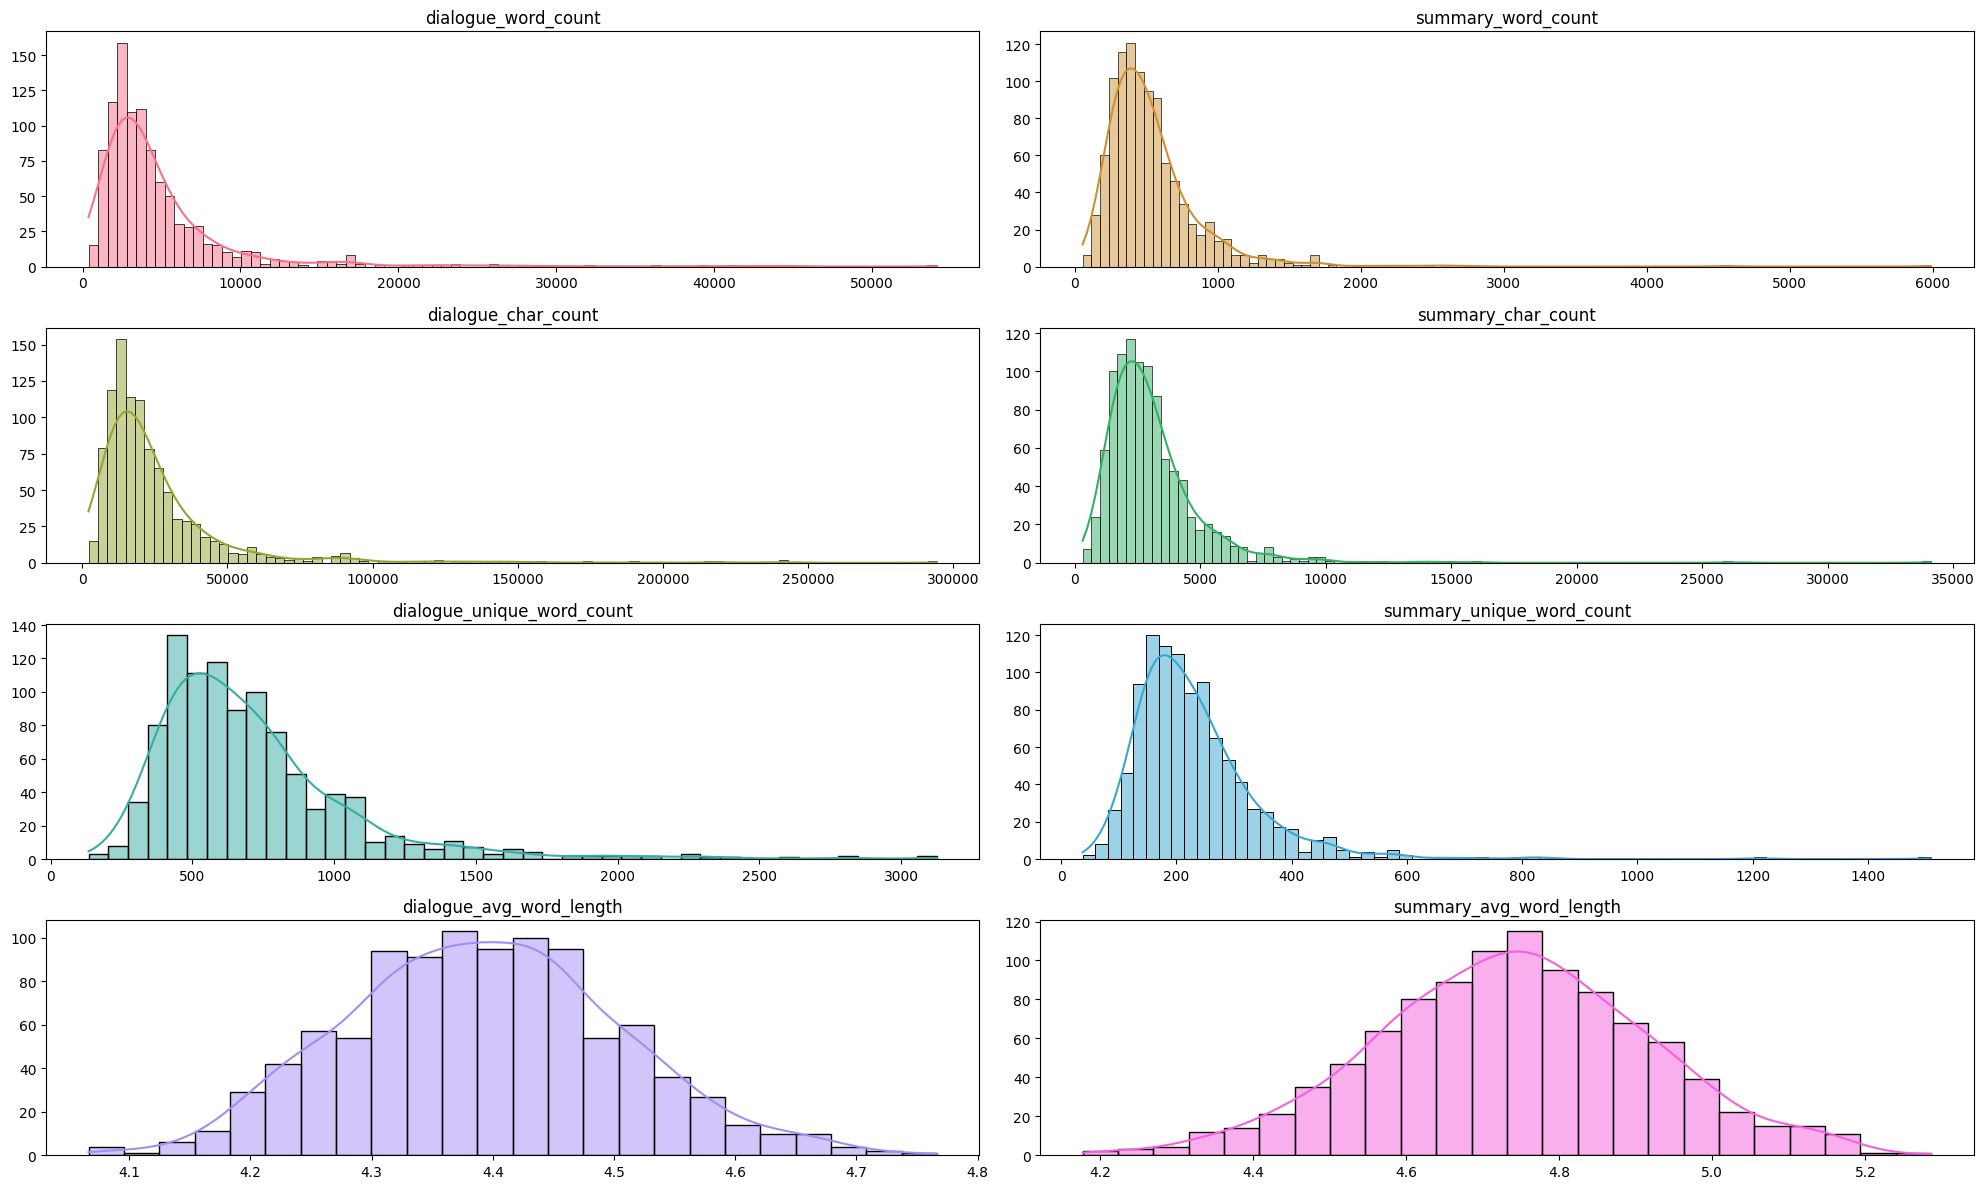

In [20]:
columns = [
    "dialogue_word_count", "summary_word_count", "dialogue_char_count", "summary_char_count", "dialogue_unique_word_count", "summary_unique_word_count", 

    "dialogue_avg_word_length","summary_avg_word_length"
]

# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

fig, axes = plt.subplots(4, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The code creates a series of horizontal box plots to visualize the distribution of various text features in the DataFrame `df`, including word counts, character counts, and average word lengths for both dialogue and summary columns. It starts by defining a list of columns to be plotted and assigns distinct colors to each box plot using Seaborn's `husl` color palette. A grid of subplots (4 rows and 2 columns) is created, and for each column in the list, a box plot is generated. The `sns.boxplot` function is used to display the distribution of values for each feature, with the column name displayed as the y-axis label and a generic "Value" label for the x-axis. Any empty subplots are removed if there are fewer columns than subplots. Finally, the layout is adjusted to ensure proper spacing between the plots, and the resulting box plots are displayed, allowing for easy comparison of the distributions of the features.

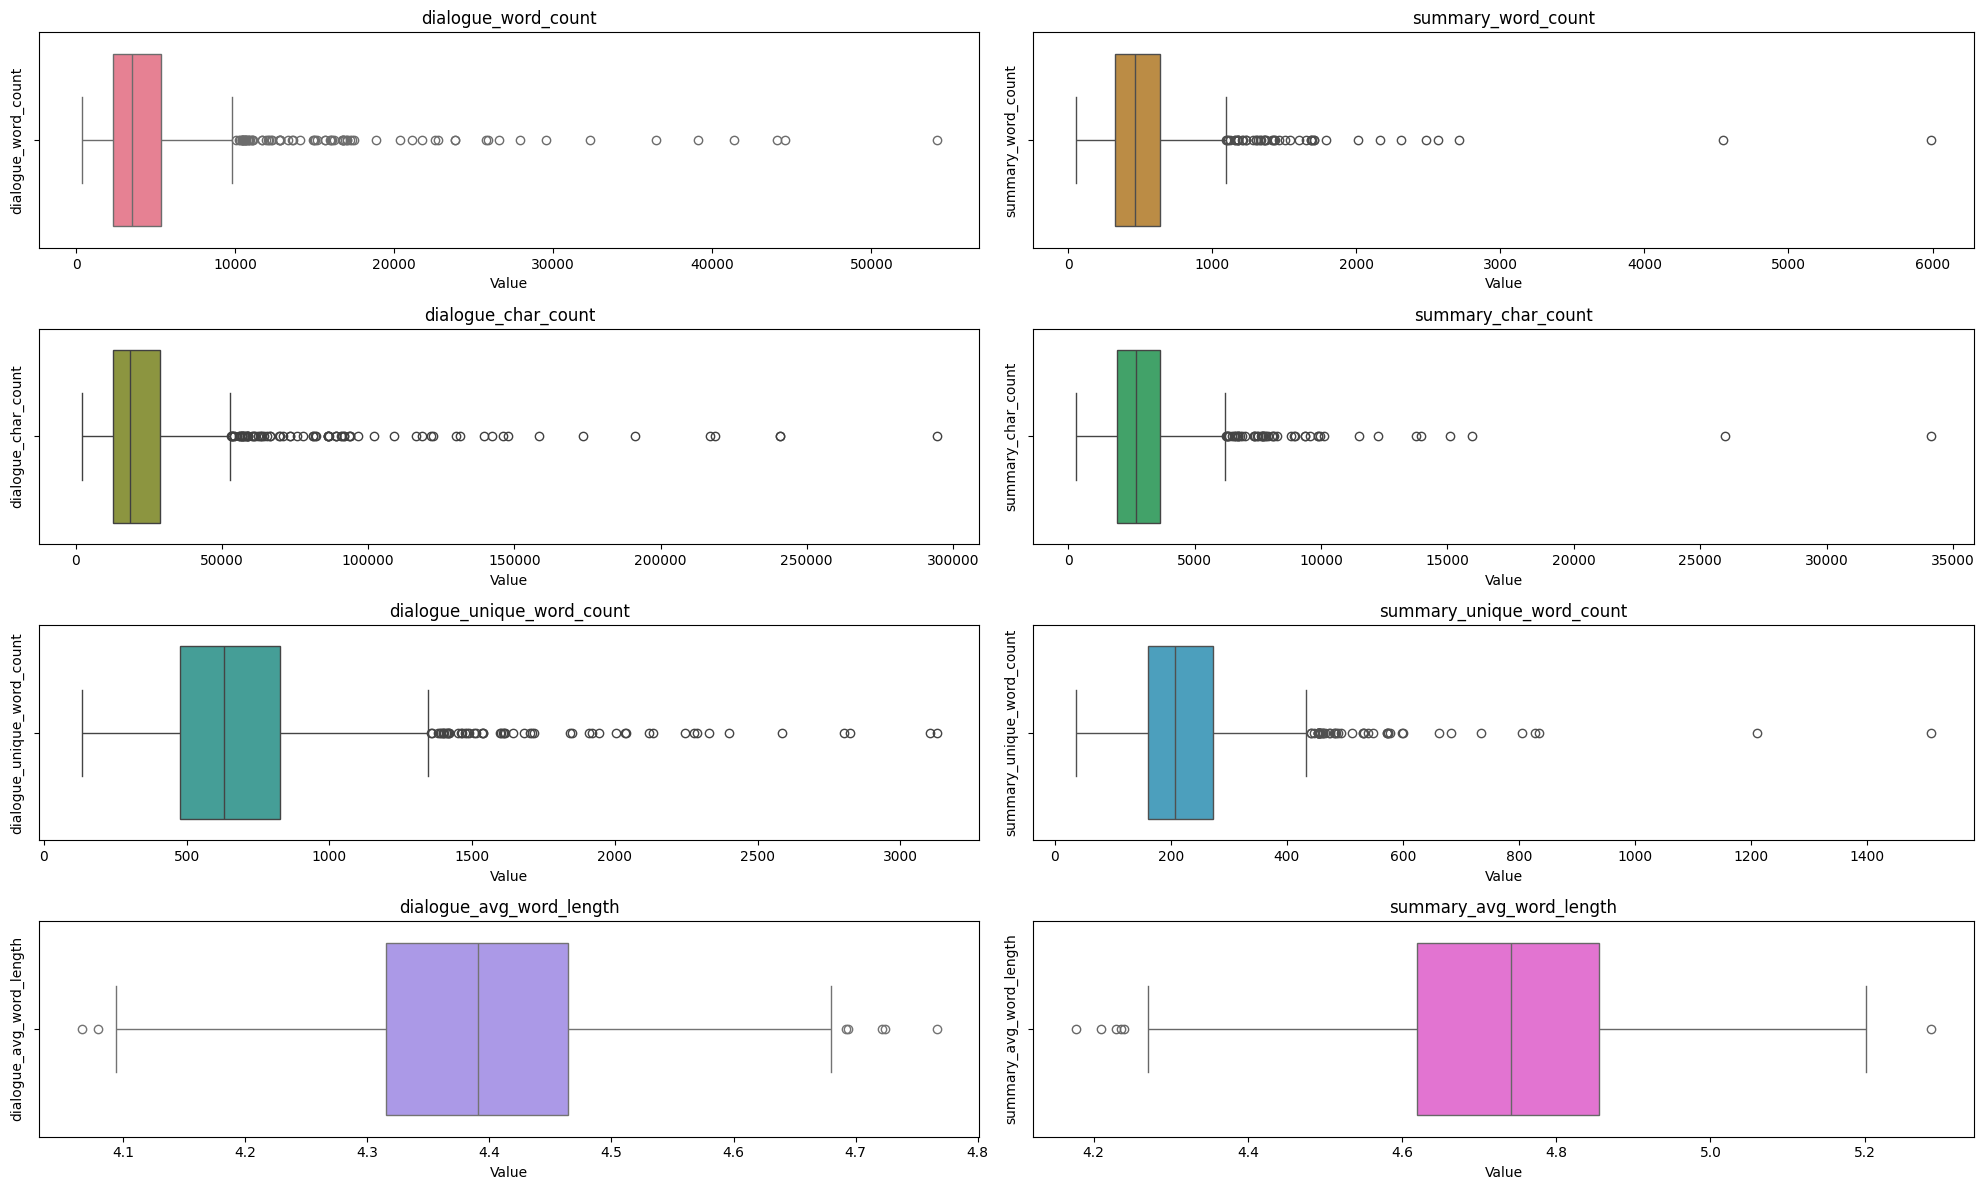

In [21]:
# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

fig, axes = plt.subplots(4, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[i])  # Set `x=column` for horizontal box plots
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")  # Generic x-axis label for all plots
    axes[i].set_ylabel(column)  # Show the column name on the y-axis

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


The command `df.describe()` provides a summary of the numerical columns in the DataFrame `df`. It generates descriptive statistics such as:

- **Count**: The number of non-null entries in each column.
- **Mean**: The average value of each column.
- **Standard Deviation (std)**: The measure of the amount of variation or dispersion of values in each column.
- **Min**: The minimum value in each column.
- **25%** (1st Quartile): The value below which 25% of the data falls.
- **50%** (Median or 2nd Quartile): The middle value in the data set, where half the values are above and half are below.
- **75%** (3rd Quartile): The value below which 75% of the data falls.
- **Max**: The maximum value in each column.

This function is typically used to get a quick overview of the distribution and central tendencies of numerical data in the dataset. It can help identify outliers or skewed distributions as well.

In [22]:
df.describe()

dialogue_word_count  summary_word_count  dialogue_char_count  \
count          1000.000000          1000.00000          1000.000000   
mean           4759.541000           538.10300         25690.313000   
std            4865.639601           375.12402         26354.502792   
min             378.000000            56.00000          2122.000000   
25%            2312.500000           327.00000         12508.000000   
50%            3481.500000           461.00000         18632.500000   
75%            5357.500000           635.00000         28597.250000   
max           54107.000000          5988.00000        294508.000000   

       summary_char_count  dialogue_unique_word_count  \
count         1000.000000                 1000.000000   
mean          3087.407000                  711.528000   
std           2152.445708                  358.669537   
min            312.000000                  134.000000   
25%           1907.000000                  478.000000   
50%           2657.500000                  631.000000   
75%           3643.250000                  828.250000   
max          34123.000000                 3127.000000   

       summary_unique_word_count  dialogue_avg_word_length  \
count                1000.000000               1000.000000   
mean                  230.510000                  4.391900   
std                   112.533434                  0.112548   
min                    37.000000                  4.066369   
25%                   160.750000                  4.315184   
50%                   208.000000                  4.390601   
75%                   272.000000                  4.464301   
max                  1510.000000                  4.766496   

       summary_avg_word_length  
count              1000.000000  
mean                  4.739804  
std                   0.178140  
min                   4.177570  
25%                   4.618849  
50%                   4.741301  
75%                   4.855223  
max                   5.285714

In [23]:
df

Text  \
0    Appeal No. LXVI of 1949.\nAppeal from the High...   
1    Civil Appeal No.94 of 1949.\n107 834 Appeal fr...   
2    iminal Appeal No. 40 of 1951, 127 Appeal from ...   
3    Appeal No. 388 of 1960.\nAppeal by special lea...   
4    Appeal No. 198 of 1954.\nAppeal from the judgm...   
..                                                 ...   
995  ivil Appeal No. 414 of 1965.\nAppeal from the ...   
996  ivil Appeal No. 195 of 1963.\nAppeal from the ...   
997  Appeal No. 765 of1964.\nAppeal by special leav...   
998  ivil Appeal No. 875 of 1964.\nAppeal by specia...   
999  ppeal No. 652 of 1964, Appeal from the judgmen...   

                                               Summary  \
0    The charge created in respect of municipal pro...   
1    An agreement for a lease, which a lease is by ...   
2    The question whether a Magistrate is "personal...   
3    The appellant was a member of a joint Hindu fa...   
4    The appellant was the Ruler of the State of Ba...   
..                                                 ...   
995  The appellant .company reduced its capital and...   
996  A widow whose estate was under the charge of t...   
997  The appellant 's election was challenged inter...   
998  The appellant and respondent were the tenant a...   
999  The Sales Tax Officer rejected the assessed 's...   

                                      cleaned_dialogue  \
0    appeal no lxvi of 1949 appeal from the high co...   
1    civil appeal no.94 of 1949 107 834 appeal from...   
2    iminal appeal no 40 of 1951 127 appeal from th...   
3    appeal no 388 of 1960 appeal by special leave ...   
4    appeal no 198 of 1954 appeal from the judgment...   
..                                                 ...   
995  ivil appeal no 414 of 1965 appeal from the jud...   
996  ivil appeal no 195 of 1963 appeal from the jud...   
997  appeal no 765 of1964 appeal by special leave f...   
998  ivil appeal no 875 of 1964 appeal by special l...   
999  ppeal no 652 of 1964 appeal from the judgment ...   

                                       cleaned_summary  dialogue_word_count  \
0    The charge created in respect of municipal pro...                 3356   
1    An agreement for a lease, which a lease is by ...                 2396   
2    The question whether a Magistrate is "personal...                 3213   
3    The appellant was a member of a joint Hindu fa...                 3497   
4    The appellant was the Ruler of the State of Ba...                 2575   
..                                                 ...                  ...   
995  The appellant .company reduced its capital and...                 6762   
996  A widow whose estate was under the charge of t...                 2893   
997  The appellant 's election was challenged inter...                 2744   
998  The appellant and respondent were the tenant a...                 5767   
999  The Sales Tax Officer rejected the assessed 's...                 2655   

     summary_word_count  dialogue_char_count  summary_char_count  \
0                   152                17786                 836   
1                   153                12595                 799   
2                   348                17541                2039   
3                   216                19092                1278   
4                   229                13878                1275   
..                  ...                  ...                 ...   
995                 971                37134                5685   
996                 537                15238                2971   
997                 269                14993                1541   
998                 584                30733                3336   
999                 542                14396                3079   

     dialogue_unique_word_count  summary_unique_word_count  \
0                           650                         75   
1                           561                        102   
2      

# Data Correlations

The code generates a **pairplot** to visualize the relationships between the selected numerical columns in the DataFrame `df`. First, it creates a new DataFrame `correlation_data` by selecting only the relevant columns defined in the `columns` list. Then, using Seaborn's `pairplot` function, it creates a grid of scatterplots to explore how each pair of variables relates to one another, with Kernel Density Estimation (KDE) plots shown along the diagonal to visualize the distribution of individual variables. The transparency of the scatterplot markers is adjusted with `alpha=0.7`, and the marker size is set to `s=20`. Finally, `plt.show()` displays the resulting pairplot, allowing for a comprehensive exploration of correlations and trends within the data.

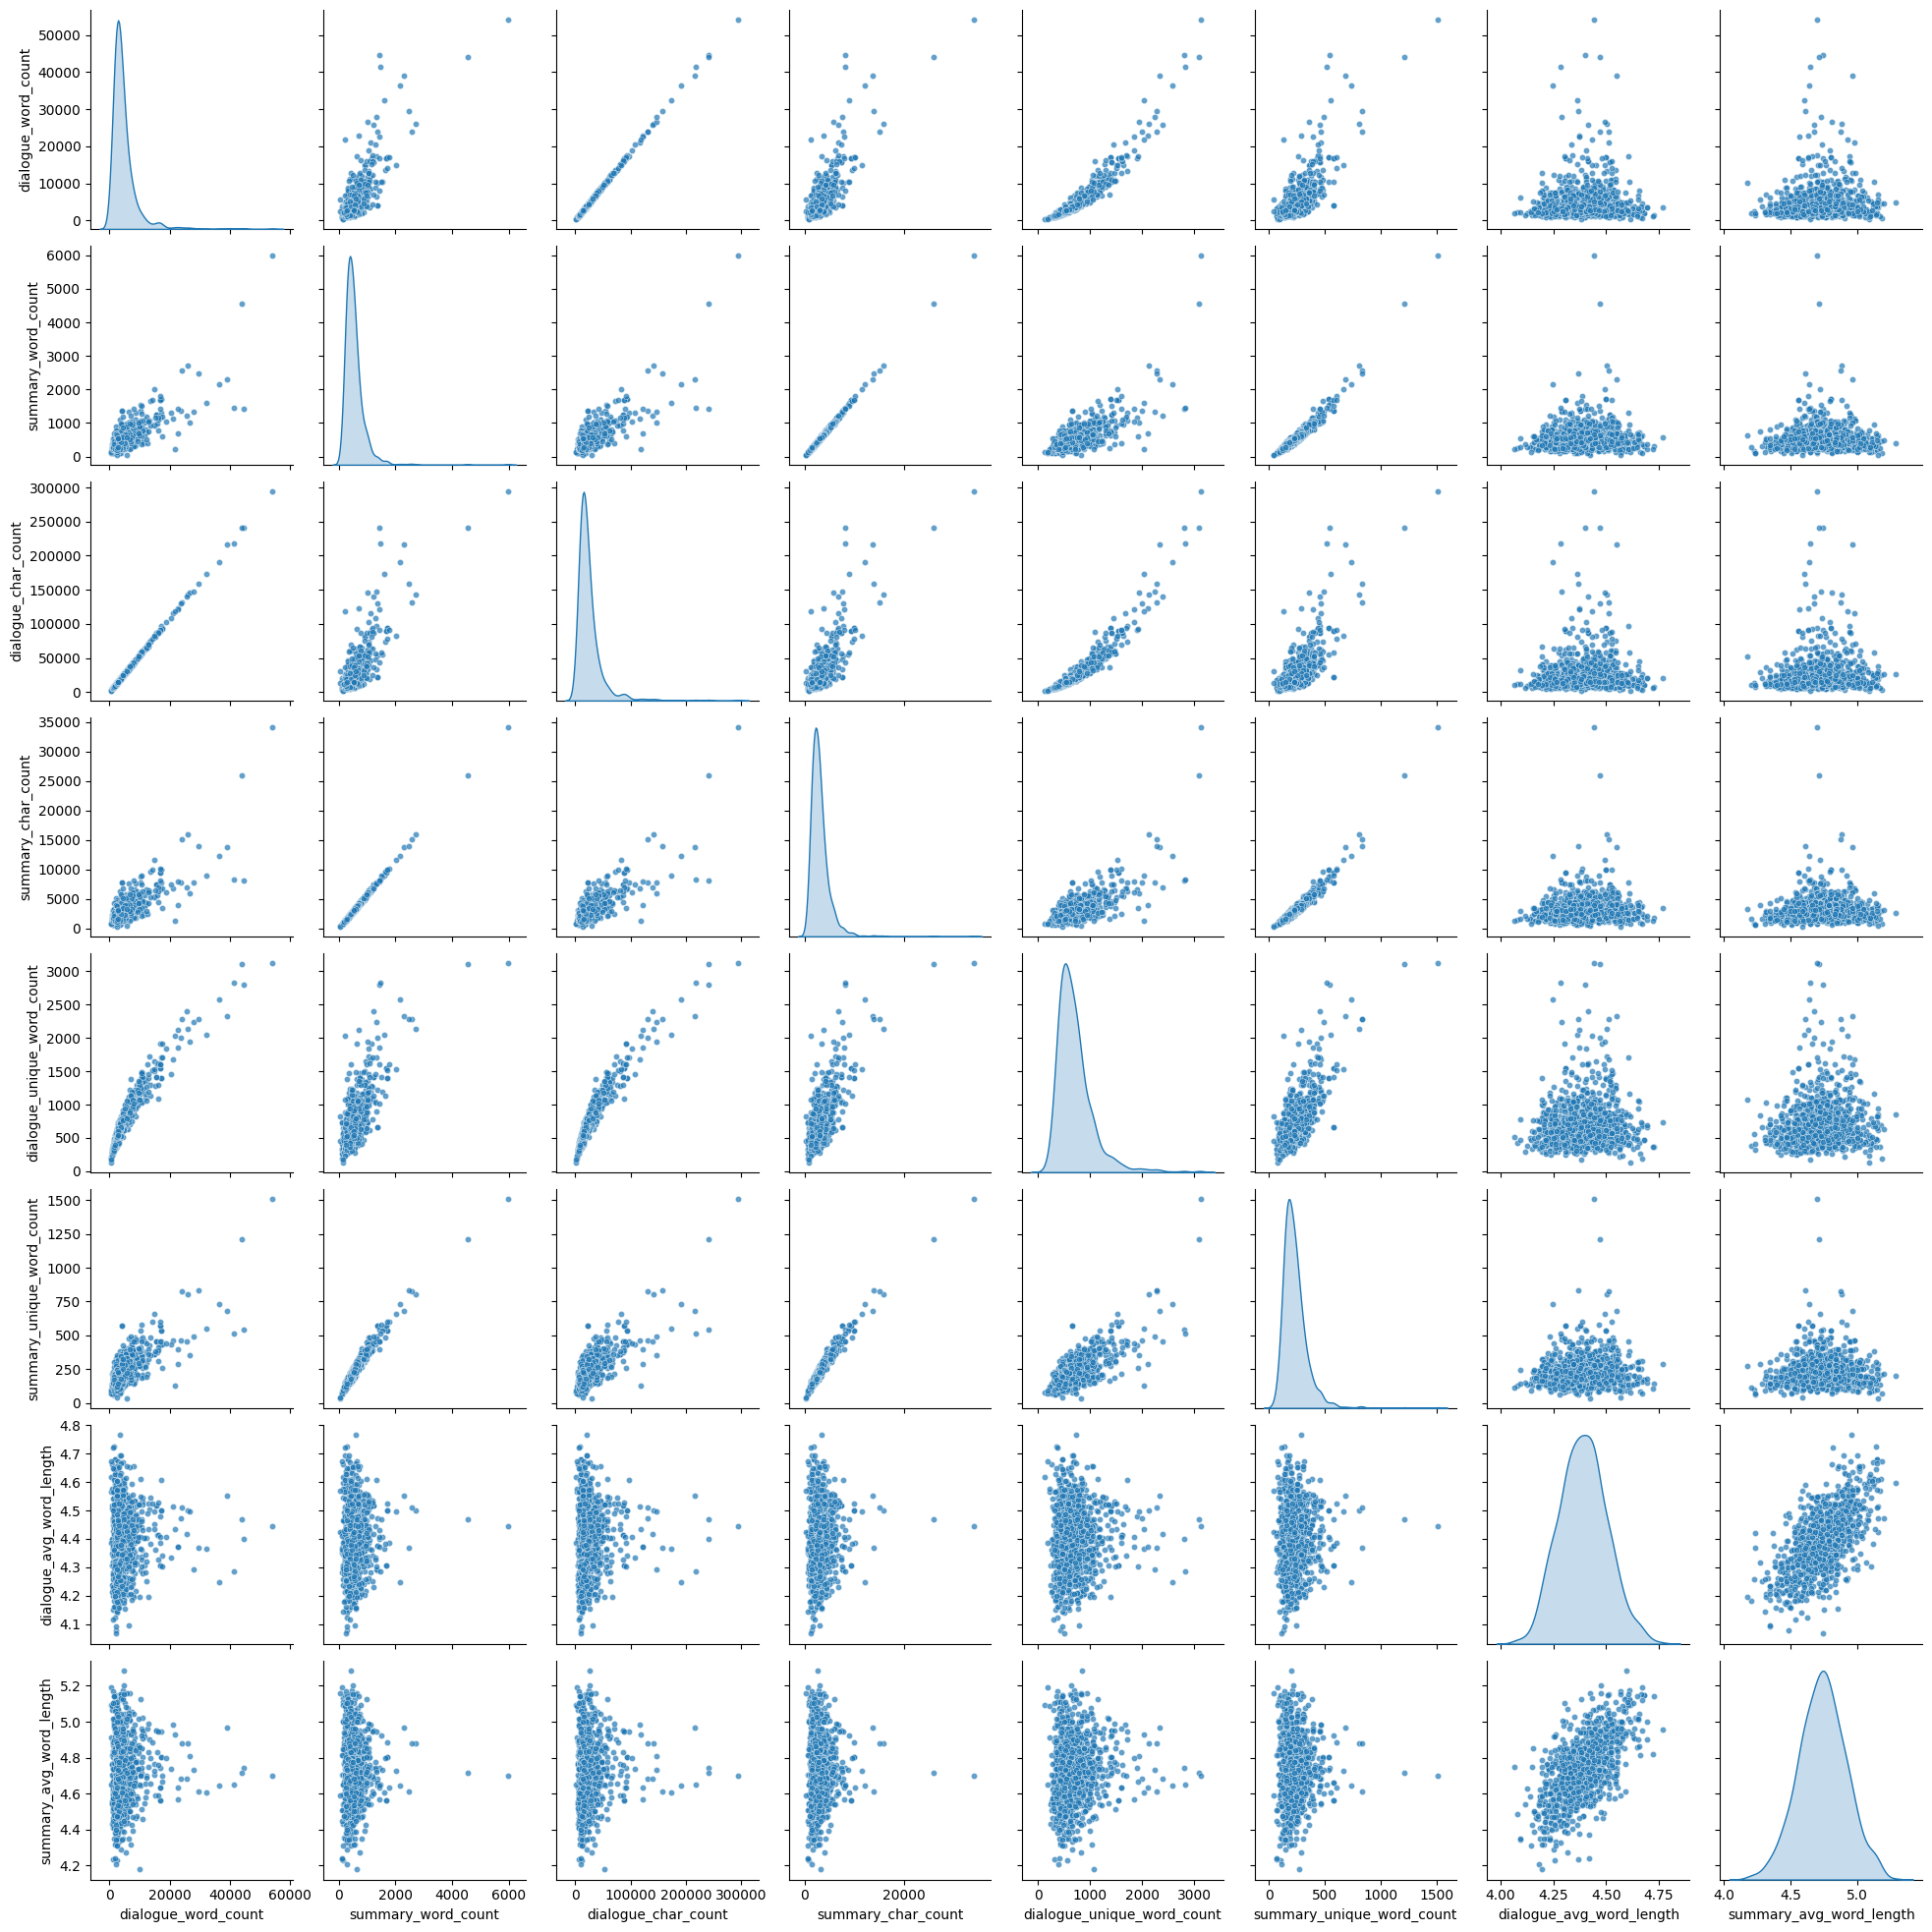

In [24]:
# Select only the relevant columns from the DataFrame
correlation_data = df[columns]

# Create a pairplot for the selected columns
sns.pairplot(correlation_data, diag_kind="kde", plot_kws={"alpha": 0.7, "s": 20})

# Show the plots
plt.show()

The code generates a **heatmap** to visualize the correlation matrix of the selected numerical columns in the DataFrame `df`. First, it calculates the correlation matrix using the `.corr()` method on the relevant columns, which computes the Pearson correlation coefficients between each pair of variables. The heatmap is then created using Seaborn's `heatmap` function, with annotations displaying the correlation values in each cell. The color scheme, `coolwarm`, is used to differentiate negative correlations (blue) from positive correlations (red), with a range from -1 to 1. The heatmap is square-shaped, and thin lines between cells are added for clarity. A title is set for the plot, and the figure is displayed using `plt.show()`. This visualization helps to easily identify the relationships between variables, highlighting strong correlations or patterns in the data.

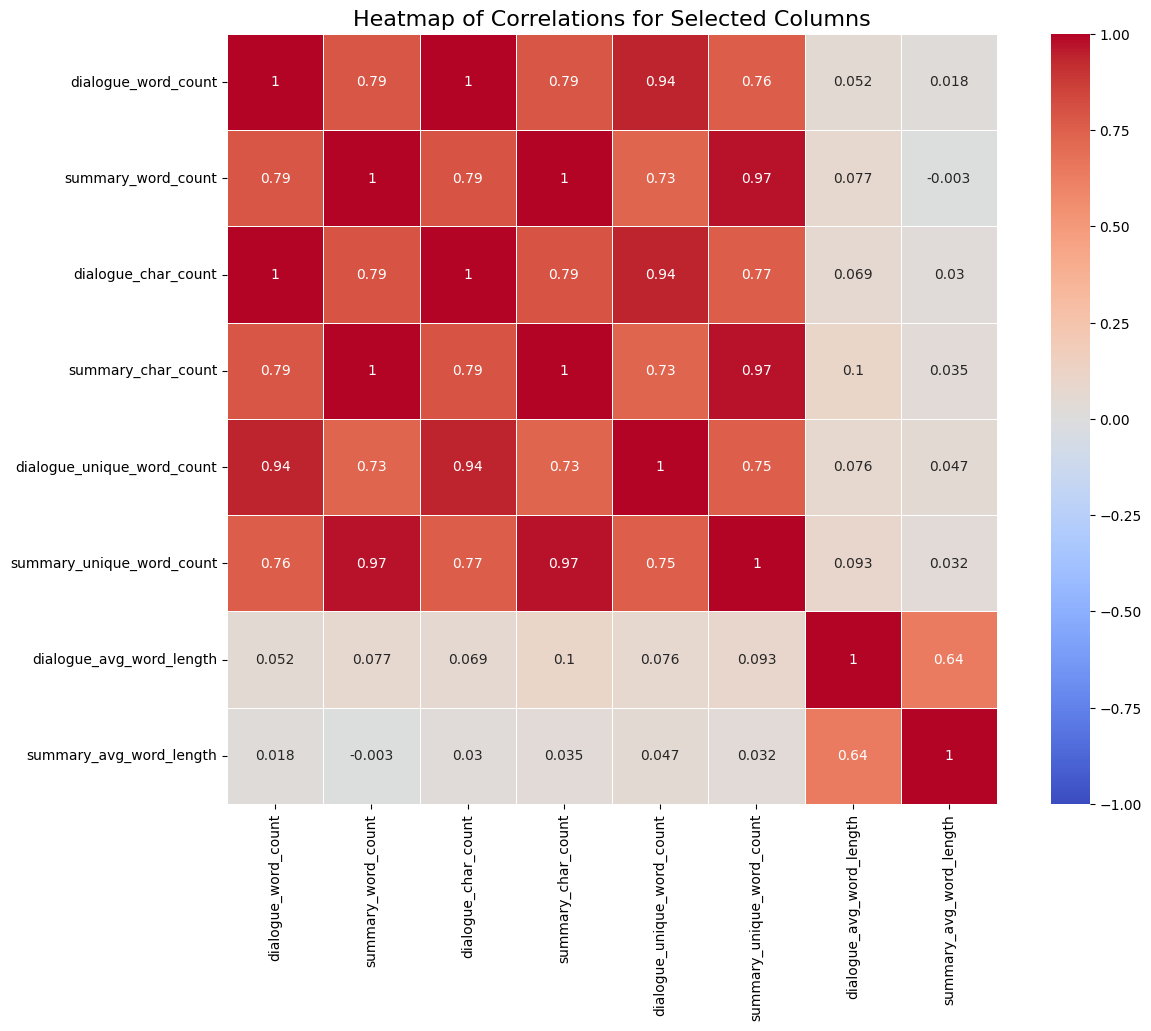

In [25]:
corr_data = df[columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlations for Selected Columns', fontsize=16)
plt.show()

The code generates a **word cloud** to visually represent the most frequent words in the cleaned dialogue text from the DataFrame `df`. It first combines all the cleaned dialogue entries into a single string and removes common stopwords using the default stopwords set from the `WordCloud` library. Then, the `WordCloud` class is used to create the word cloud with specified parameters, such as setting the background color to white, applying the 'viridis' colormap, limiting the display to the top 200 most frequent words, and adding a steel blue contour for emphasis. The resulting word cloud is displayed with smooth rendering and no axis, providing a clear visual of the most commonly used words in the dialogue data. This visualization helps to quickly identify key terms and themes within the text.

In [26]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


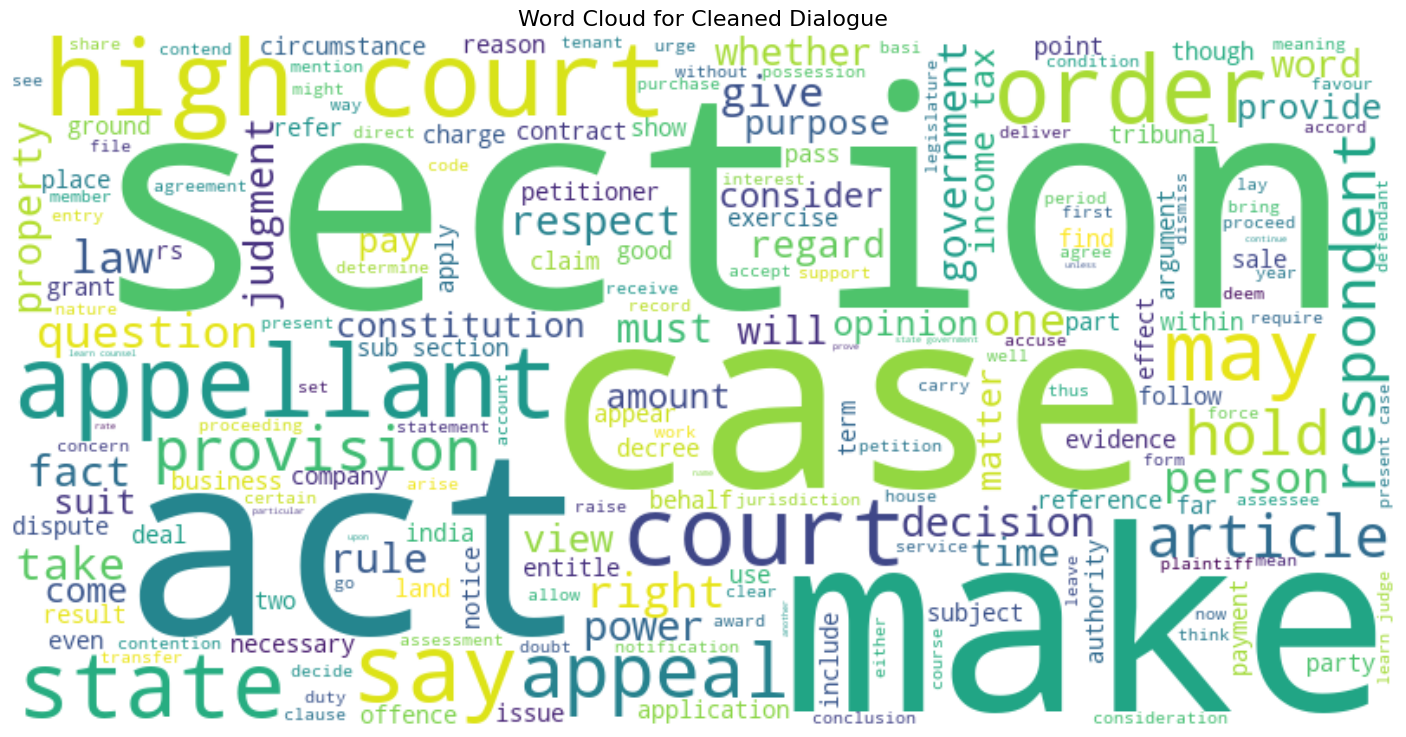

In [27]:
from wordcloud import WordCloud, STOPWORDS

all_dialogues = " ".join(df["cleaned_dialogue"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate(all_dialogues)

# Plot the word cloud
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cleaned Dialogue", fontsize=16)
plt.show()

The code generates a **word cloud** to visualize the most frequent words in the cleaned summary text from the DataFrame `df`. It first combines all the cleaned summaries into a single string and removes common stopwords using the default stopwords set from the `WordCloud` library. Then, the `WordCloud` class is used to generate the word cloud with several parameters, such as setting the background color to white, using the 'viridis' colormap, limiting the display to the top 200 most frequent words, and adding a steel blue contour for aesthetic enhancement. Finally, the word cloud is displayed with smooth rendering and no axis. This visualization highlights the most prominent terms in the summary data, providing insight into key concepts or themes from the summaries.

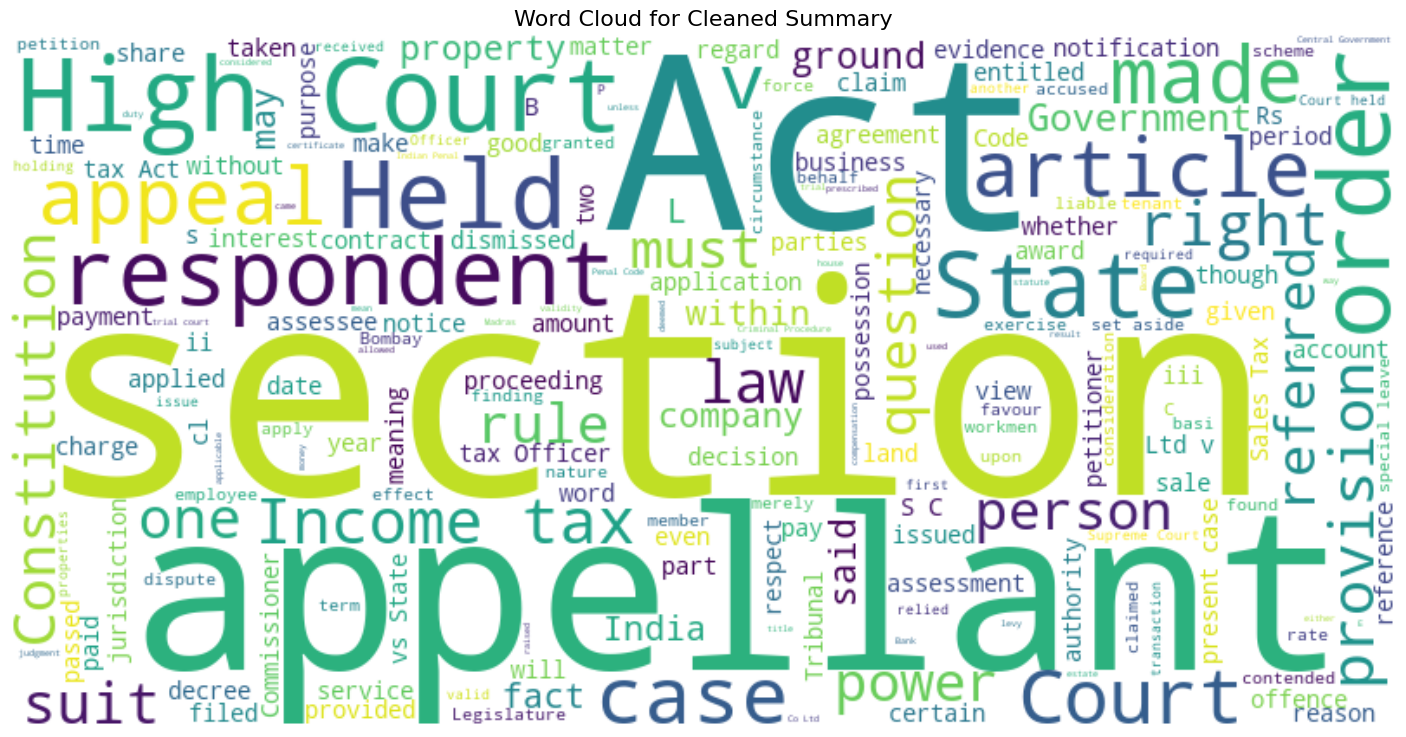

In [28]:
from wordcloud import WordCloud, STOPWORDS

all_dialogues = " ".join(df["cleaned_summary"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate(all_dialogues)

# Plot the word cloud
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cleaned Summary", fontsize=16)
plt.show()

The code generates a bigram word cloud to visualize the most frequent two-word combinations (bigrams) in the cleaned dialogue text from the DataFrame df. First, all the cleaned dialogues are combined into a single string, and stopwords are defined to filter out common words. Then, a CountVectorizer is used to extract bigrams (two-word combinations) from the text, and the frequency of each bigram is calculated. The top 200 bigrams with the highest frequencies are selected for the word cloud. The WordCloud class is used to generate a word cloud based on these bigram frequencies, with a visually distinct color palette and a smooth rendering. The resulting word cloud is displayed without axes, highlighting the most common bigrams in the dialogue, which helps to identify prevalent word pairs or themes in the dataset.

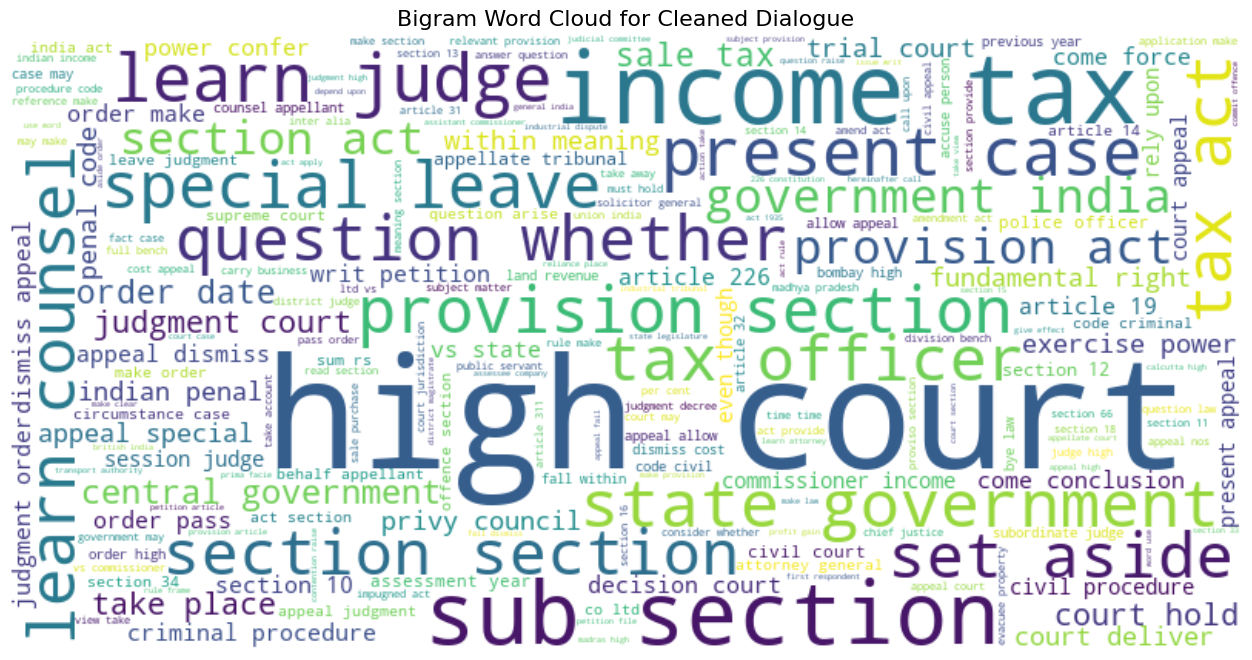

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Combine all cleaned dialogues into a single string
all_dialogues = " ".join(df["cleaned_dialogue"])

# Define stopwords (convert to list)
stopwords_list = list(STOPWORDS)

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
X = vectorizer.fit_transform([all_dialogues])
bigram_freq = X.toarray().sum(axis=0)

# Create a DataFrame of bigrams and their frequencies
bigram_freq_df = pd.DataFrame(bigram_freq, index=vectorizer.get_feature_names_out(), columns=["frequency"])

# Sort bigrams by frequency
bigram_freq_df = bigram_freq_df.sort_values(by="frequency", ascending=False)

# Select the top 200 bigrams for the word cloud
top_bigrams = bigram_freq_df.head(200)

# Generate the bigram word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate_from_frequencies(top_bigrams["frequency"].to_dict())

# Plot the word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for Cleaned Dialogue", fontsize=16)
plt.show()


This code generates a **bigram word cloud** to visualize the most frequent two-word combinations (bigrams) in the cleaned summary text from the DataFrame `df`. First, it combines all the cleaned summaries into a single string and filters out common stopwords using the `STOPWORDS` set. Then, a `CountVectorizer` is used to extract bigrams (two-word combinations) from the text, which are represented by their frequency counts. The bigrams are sorted by frequency, and the top 200 most frequent bigrams are selected for the word cloud. Using the `WordCloud` class, a word cloud is generated based on these frequencies, with a visually appealing 'viridis' colormap and steel blue contours. Finally, the word cloud is displayed without axes, providing a clear and aesthetically pleasing visualization of the most common bigrams in the cleaned summary data. This helps to identify key recurring word pairs or themes in the dataset.

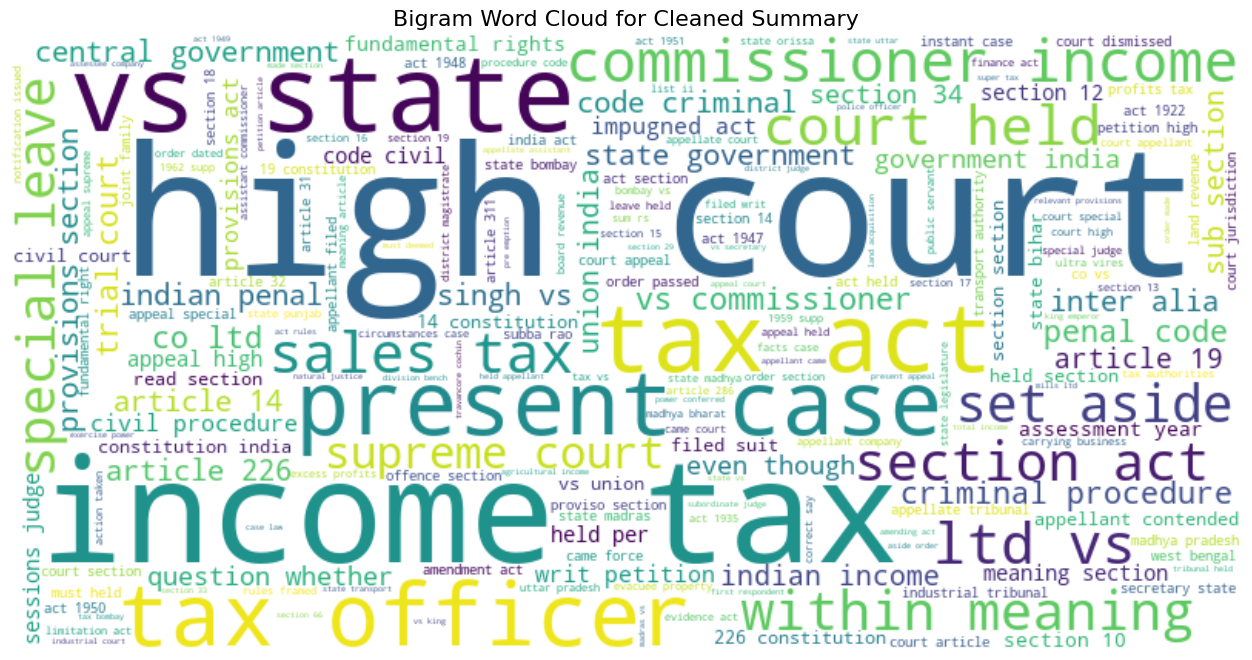

In [30]:
# Combine all cleaned dialogues into a single string
all_dialogues = " ".join(df["cleaned_summary"])

# Define stopwords (convert to list)
stopwords_list = list(STOPWORDS)

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
X = vectorizer.fit_transform([all_dialogues])
bigram_freq = X.toarray().sum(axis=0)

# Create a DataFrame of bigrams and their frequencies
bigram_freq_df = pd.DataFrame(bigram_freq, index=vectorizer.get_feature_names_out(), columns=["frequency"])

# Sort bigrams by frequency
bigram_freq_df = bigram_freq_df.sort_values(by="frequency", ascending=False)

# Select the top 200 bigrams for the word cloud
top_bigrams = bigram_freq_df.head(200)

# Generate the bigram word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate_from_frequencies(top_bigrams["frequency"].to_dict())

# Plot the word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for Cleaned Summary", fontsize=16)
plt.show()


-------------------------------------------------

# Abstractive Summarization

Using a pre-trained transformer model like BART

This section uses a pre-trained BART model for summarization from Hugging Face to generate a summary for a sample dialogue. It compares the model's predicted summary with the actual summary from the dataset.

1. **Load pre-trained BART model**: Using `pipeline("summarization")` with `facebook/bart-large-cnn`.
2. **Input example dialogue**: Selects a dialogue from the dataset (`df['cleaned_dialogue'][0]`).
3. **Generate summary**: The model creates a summary with specified length constraints.
4. **Compare with actual summary**: Prints the predicted summary and compares it to the actual one from the dataset.

This helps evaluate the model's performance.

In [31]:
from transformers import pipeline

# Load pre-trained BART model for summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


Device set to use cuda:0


In [32]:
# Example dialogue
dialogue = df['cleaned_dialogue'][0]

dialogue

'appeal no lxvi of 1949 appeal from the high court of judicature bombay in a reference under section 66 of the indian income tax act 1022 k.m munshi n. p. nathvani with he for the appel lant m.c setalvad attorney general for india h. j. umrigar with he for the respondent 1950 may 26 the judgment of the court be deliver by mehr chand mahajan j. this be an appeal against a judgment of the high court of judicature at bombay in an income tax matter and it raise the question whether munici pal property tax and urban immoveable property tax payable under the relevant bombay act be allowable deduction under section 9 1 iv of the indian income tax act the assessee company be an investment company derive its income from property in the city of bombay for the assessment year 1940 41 the net income of the assessee under the head property be compute by the income tax officer in the sum of rs 6,21,764 after deduct from gross rent certain payment the company have pay during the relevant year rs 1,22

In [33]:
dialogue = dialogue[:1024]  # Limit input to 1024 characters
summary = summarizer(dialogue, max_length=100, min_length=20, do_sample=False)


summary[0]['summary_text']

'This is an appeal from the high court of judicature bombay in a reference under section 66 of the indian income tax act 1022 k.m munshi n. p. nathvani with he for the appel lant m.c setalvad attorney general for india h. j. umrigar.'

In [34]:
print("Predicted Summary", summary[0]['summary_text'] )
print("---------------------------------")
print("Actual Summary", df['cleaned_summary'][0])

Predicted Summary This is an appeal from the high court of judicature bombay in a reference under section 66 of the indian income tax act 1022 k.m munshi n. p. nathvani with he for the appel lant m.c setalvad attorney general for india h. j. umrigar.
---------------------------------
Actual Summary The charge created in respect of municipal property tax by section 212 of the City of Bombay Municipal Act, 1888, is an "annual charge not being a capital charge" within the mean ing of section 9 (1) (iv) of the Indian Income tax Act, 199.2, and the amount of such charge should therefore be deducted in computing the income from such property for the purposes of section 9 of the Indian Income tax Act. The charge in respect of urban immoveable property tax created by the Bombay Finance Act, 1939 is similar in character and the amount of such charge should also be deducted. The expression "capital charge" in s.9(1) (iv) means a charge created for a capital sum,that is to say, a charge created t

In [35]:
# Generate summary
summary = summarizer(dialogue, max_length=50, min_length=25, do_sample=False)
print("Predicted Summary", summary[0]['summary_text'] )
print("---------------------------------")
print("Actual Summary", df['cleaned_summary'])

Predicted Summary Appeal from the high court of judicature bombay in a reference under section 66 of the indian income tax act 1022 k.m munshi n. p. nathvani with he for the appel l
---------------------------------
Actual Summary 0      The charge created in respect of municipal pro...
1      An agreement for a lease, which a lease is by ...
2      The question whether a Magistrate is "personal...
3      The appellant was a member of a joint Hindu fa...
4      The appellant was the Ruler of the State of Ba...
                             ...                        
995    The appellant .company reduced its capital and...
996    A widow whose estate was under the charge of t...
997    The appellant 's election was challenged inter...
998    The appellant and respondent were the tenant a...
999    The Sales Tax Officer rejected the assessed 's...
Name: cleaned_summary, Length: 1000, dtype: object


# Custom Training

Using the above dataset, custom training transformer model : BART



This notebook section walks through fine-tuning a pre-trained BART model (`facebook/bart-large-cnn`) for text summarization. Below is an explanation of the steps and configurations:

---

#### **1. Environment Setup**
- **GPU Check**: Ensures that the model training utilizes GPU if available for faster processing.
- **Device Assignment**: The model and computations are transferred to the appropriate device (`cuda` or `cpu`).

---

#### **2. Loading the Pre-trained Model and Tokenizer**
- The BART model and its tokenizer are loaded using Hugging Face's `from_pretrained` function.
- `facebook/bart-large-cnn` is pre-trained on summarization tasks, making it an ideal starting point.

---

#### **3. Dataset Preparation**
- **Input and Output Texts**: The dataset consists of dialogues (`cleaned_dialogue`) and their respective summaries (`cleaned_summary`).
- **Dataset Conversion**: The data is formatted into a Hugging Face `Dataset` object.

---

#### **4. Splitting Data**
- The dataset is split into training (80%) and evaluation (20%) subsets using the `train_test_split` method.

---

#### **5. Tokenization**
- **Custom Tokenization Function**: Input dialogues and their corresponding summaries are tokenized with:
  - `max_length` constraints for truncation.
  - `padding` for uniform input dimensions.
- Tokenized labels (summaries) are added to the model inputs.

---

#### **6. Training Arguments**
The training process is configured using `TrainingArguments`:
- **Output Directory**: `./results` will store logs and outputs.
- **Evaluation Strategy**: Model is evaluated at the end of each epoch.
- **Learning Rate**: A fine-tuning-friendly value of `2e-5` is chosen.
- **Batch Sizes**: Configured for both training and evaluation phases.
- **Epochs**: Set to 3 for demonstration purposes.
- **Mixed Precision (FP16)**: Enables efficient GPU training.
- **Logging**: Logs are saved in `./logs`.

---

#### **7. Trainer Initialization**
- The Hugging Face `Trainer` is instantiated to:
  - Fine-tune the BART model on the tokenized training dataset.
  - Evaluate the model using the tokenized evaluation dataset.

---

#### **8. Model Training**
- The model is trained using the `Trainer.train()` function, which manages the training loop and GPU optimizations.

This process customizes the BART model for domain-specific summarization, improving its accuracy on dialogue datasets.each component and step in the code.

In [36]:
import torch
torch.cuda.empty_cache()


In [37]:
from transformers import BartForConditionalGeneration, BartTokenizer, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import torch

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pre-trained BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn").to(device)
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Prepare your dataset
data = {
    'input_text': df['cleaned_dialogue'].tolist(),
    'output_text': df['cleaned_summary'].tolist()
}
train_dataset = Dataset.from_dict(data)

# Example split: 80% train, 20% eval
split_datasets = train_dataset.train_test_split(test_size=0.2)

# Tokenize the dataset
def tokenize_function(examples):
    model_inputs = tokenizer(examples['input_text'], max_length=1024, truncation=True, padding="max_length")
    labels = tokenizer(examples['output_text'], max_length=150, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply tokenization to both train and eval datasets
tokenized_datasets = {
    "train": split_datasets["train"].map(tokenize_function, batched=True),
    "eval": split_datasets["test"].map(tokenize_function, batched=True)
}

# Define training arguments with GPU support
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",     # evaluation strategy
    learning_rate=2e-5,              # learning rate
    per_device_train_batch_size=4,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=3,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
    fp16=True,                       # enable mixed precision training for GPU
    save_strategy="no",           # save checkpoints every epoch
    logging_dir='./logs',            # directory for logging
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                              # the instantiated 🤗 Transformers model
    args=training_args,                       # training arguments, defined above
    train_dataset=tokenized_datasets["train"], # tokenized training dataset
    eval_dataset=tokenized_datasets["eval"],   # tokenized evaluation dataset
)

# Train the model
trainer.train()

Using device: cuda


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

TrainOutput(global_step=600, training_loss=1.7552196502685546, metrics={'train_runtime': 18207.0568, 'train_samples_per_second': 0.132, 'train_steps_per_second': 0.033, 'total_flos': 5201051045068800.0, 'train_loss': 1.7552196502685546, 'epoch': 3.0})

The code saves the fine-tuned BART model and token[  2wzzaq22qazzer to a folder called `./bart_summary_model`. The model and tokenizer will be saved in the current working directory, and a message `"Model saved!"` is printed for confirmation.

In [38]:
model.save_pretrained("./bart_summary_model")
tokenizer.save_pretrained("./bart_summary_model")
print("Model saved!")

Model saved!



In this notebook, we will evaluate the performance of our summarization model using standard metrics. Two important libraries are required for this:

**1.evaluate** : A library from Hugging Face that provides an easy-to-use interface for computing various evaluation metrics, including accuracy, BLEU, ROUGE, and others. We will use this to compute ROUGE scores, a common evaluation metric for text generation tasks.

**2.rouge_score**: A Python package to calculate the ROUGE (Recall-Oriented Understudy for Gisting Evaluation) metrics, which measure the quality of generated text by comparing it to reference summaries.

# Metrics



1. **Load the ROUGE Metric**: 
   - The `evaluate` library is imported and the ROUGE metric is loaded using `evaluate.load("rouge")` to assess the quality of generated summaries.

2. **Generate Predictions for the Test Set**:
   - The code initializes two lists, `generated_summaries` and `reference_summaries`, to store the model-generated summaries and the reference summaries from the dataset.

3. **Iterate Over Evaluation Dataset**:
   - It iterates through the evaluation data, decoding both the input texts and reference summaries from token IDs to text.

4. **Generate Model Summaries**:
   - The input text is tokenized, passed to the BART model, and a summary is generated using beam search with specific length parameters (`max_length`, `min_length`, `num_beams`).

5. **Store Summaries**: 
   - The generated summaries are appended to `generated_summaries`, and the reference summaries to `reference_summaries`.

6. **Compute ROUGE Scores**:
   - ROUGE scores are computed using `rouge.compute()` by comparing the generated summaries to the reference summaries.

7. **Display ROUGE Scores**: 
   - The ROUGE scores (ROUGE-1, ROUGE-2, ROUGE-L) are printed to evaluate the performance of the model's summaries.

In [40]:
import evaluate

rouge = evaluate.load("rouge")

# Generate predictions for the test set
generated_summaries = []
reference_summaries = []

for example in tokenized_datasets['eval']:
    input_text = tokenizer.decode(example['input_ids'], skip_special_tokens=True)
    reference_summary = tokenizer.decode(example['labels'], skip_special_tokens=True)
    
    # Generate summary
    inputs = tokenizer(input_text, max_length=1024, truncation=True, return_tensors="pt").to(device)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=30, num_beams=4)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Store generated and reference summaries
    generated_summaries.append(generated_summary)
    reference_summaries.append(reference_summary)

# Compute ROUGE scores
results = rouge.compute(predictions=generated_summaries, references=reference_summaries)

# Display ROUGE scores
print("ROUGE Scores:")
for key, value in results.items():
    print(f"{key}: {value}")

ROUGE Scores:
rouge1: 0.49052180673948576
rouge2: 0.22395687223438293
rougeL: 0.3104401331414619
rougeLsum: 0.31010722766406296


# Final Summarization



1. **Import Libraries**: 
   - The `BartForConditionalGeneration` and `BartTokenizer` classes from the `transformers` library are imported to load the fine-tuned BART model and tokenizer.
   - `torch` is imported to check the availability of GPU and move the model to the appropriate device.

2. **Check GPU Availability**: 
   - The code checks if a GPU is available by using `torch.cuda.is_available()`. 
   - It sets the `device` to "cuda" if a GPU is available, otherwise defaults to "cpu". This ensures that the model runs on GPU if possible, speeding up the inference process.

3. **Print Device**: 
   - The chosen device (either GPU or CPU) is printed to confirm the runtime environment.

4. **Load Fine-tuned Model and Tokenizer**: 
   - The fine-tuned BART model is loaded from the saved directory `./bart_summary_model` using `from_pretrained()` and moved to the chosen device (GPU or CPU).
   - The tokenizer is loaded in the same manner to ensure proper tokenization of input data when generating summaries.he model's summaries.

In [41]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the fine-tuned BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("./bart_summary_model").to(device)
tokenizer = BartTokenizer.from_pretrained("./bart_summary_model")

Using device: cuda




1. **Test Dialogue**: 
   - A sample dialogue `test_dialogue` is provided, which contains a conversation between Amanda and Jerry.

2. **Tokenization**:
   - The `test_dialogue` is tokenized using the `tokenizer`, with a maximum sequence length of 1024 tokens. This ensures the input fits within the model’s input size.
   - The `truncation=True` ensures that any input longer than 1024 tokens is truncated.
   - The `return_tensors="pt"` option returns the tokenized input in PyTorch tensor format, which is necessary for the model to process it.

3. **Move Inputs to Device**:
   - The tokenized inputs (like `input_ids`) are moved to the chosen device (`GPU` or `CPU`) to match where the model is located. This allows for efficient processing.

4. **Generate Summary**:
   - The model is used to generate a summary of the input dialogue using the `model.generate()` function. 
   - The function parameters control the length and diversity of the generated summary:
     - `max_length=50` limits the summary to a maximum of 50 tokens.
     - `min_length=25` ensures the summary has at least 25 tokens.
     - `length_penalty=2.0` applies a penalty to longer summaries to avoid generating summaries that are too lengthy.
     - `num_beams=4` specifies the number of beams for beam search, a technique to explore different possible summary outputs and select the best one.

5. **Decode and Print the Summary**:
   - The generated summary is decoded from token IDs back into human-readable text using the tokenizer's `decode()` method.
   - The `skip_special_tokens=True` ensures that special tokens (such as padding tokens) are omitted from the decoded output.
   - Finally, the generated summary is printed.

**Expected Output**: This code will generate a summary of the given test dialogue and print it.

In [42]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load fine-tuned BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("./bart_summary_model").to(device)
tokenizer = BartTokenizer.from_pretrained("./bart_summary_model")

# Input dialogue
test_dialogue = (
    "In this connection it is always necessary to bear in mind that where an impugned statute passed by a State Legislature is relatable to an Entry in List II it is not permissible to challenge its vires only on the ground that the method adopted by it for the recovery of the impost can be and is generally adopted in levying a duty of excise."
    "It reads thus: ""It is hereby declared that it is expedient in the public interest that the Central Government should take under its control the regulation of mines and oil fields and the development of minerals to the extent hereinafter provided""."
)

# Tokenize the input
inputs = tokenizer(test_dialogue, max_length=1024, truncation=True, return_tensors="pt")
inputs = {key: val.to(device) for key, val in inputs.items()}
print("Tokenized Input:", tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True))

# Generate summary
summary_ids = model.generate(
    inputs["input_ids"],
    max_length=50,
    min_length=10,
    length_penalty=1.5,
    num_beams=4,
    no_repeat_ngram_size=2
)
generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Output
print("Generated Summary:", generated_summary)


Using device: cuda
Tokenized Input: In this connection it is always necessary to bear in mind that where an impugned statute passed by a State Legislature is relatable to an Entry in List II it is not permissible to challenge its vires only on the ground that the method adopted by it for the recovery of the impost can be and is generally adopted in levying a duty of excise.It reads thus: It is hereby declared that it is expedient in the public interest that the Central Government should take under its control the regulation of mines and oil fields and the development of minerals to the extent hereinafter provided.
Generated Summary: Where an impugned statute passed by a State Legislature is relatable to an Entry in List II, it is not permissible to challenge its vires only on the ground that the method adopted by it for the recovery of the imp
